### Importing necessary libraries and datasets

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_csv("train.csv")

In [3]:
test_data= pd.read_csv('test.csv')

In [4]:
train_data.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [5]:
test_data.head()

,Review Text,Review Title
0,I use chia seed in my protein shakes. These ta...,Bad tast
1,I use chia seed in my protein shakes. These ta...,Bad tast
2,Don’t waste your money.,No change. No results.
3,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"
4,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"


In [6]:
train_x = train_data.drop(['topic'], axis = 1)
train_y = train_data.topic
test_x= test_data

In [7]:
train_data = train_data.drop_duplicates('Review Text')
train_data.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture
7,No good,Tastes horrible,Bad Taste/Flavor


In [8]:
test_data.shape

(2553, 2)

In [9]:
train_data['topic'].unique()

array(['Shipment and delivery', 'Customer Service', 'Allergic', 'Texture',
       'Bad Taste/Flavor', 'Too big to swallow', 'Quality/Contaminated',
       'Smells Bad', 'Too Sweet', 'Not Effective', 'Expiry',
       'Wrong Product received', 'Pricing', 'Color and texture',
       'Packaging', 'False Advertisement', 'Ingredients',
       'Inferior to competitors', 'Customer Issues', "Didn't Like",
       'Hard to Chew'], dtype=object)

In [10]:
concerns_df = train_data.groupby('topic').filter(lambda x: len(x) > 100)
concerns = concerns_df['topic'].value_counts().index.tolist()

In [11]:
concerns_df['topic'].value_counts()

Bad Taste/Flavor         619
Quality/Contaminated     574
Not Effective            525
Packaging                363
Allergic                 337
Shipment and delivery    336
Texture                  328
Too big to swallow       205
Ingredients              147
Customer Service         127
Smells Bad               102
Name: topic, dtype: int64

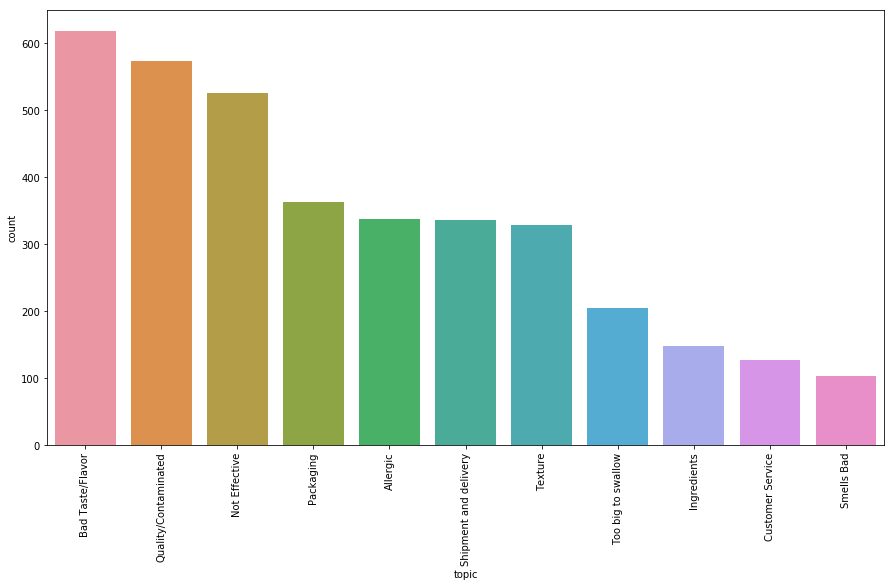

In [12]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.countplot(x = concerns_df['topic'], order = concerns, ax = ax)
plt.xticks(rotation = 90)
plt.show()

##### From the reviews in the training data, the top concerns highlighted are:
1)The highest negative reviews for the products are related to their Bad Taste/Flavour

2)Next, Quality of the products is not liked by the customers

3)A lot of people complain about the non-effectiveness of the products

4)Packaging of the products comes out to be among one of the top most concern of the customers

5)Customers also complain about the texture and allergic reaction due to the use of the products

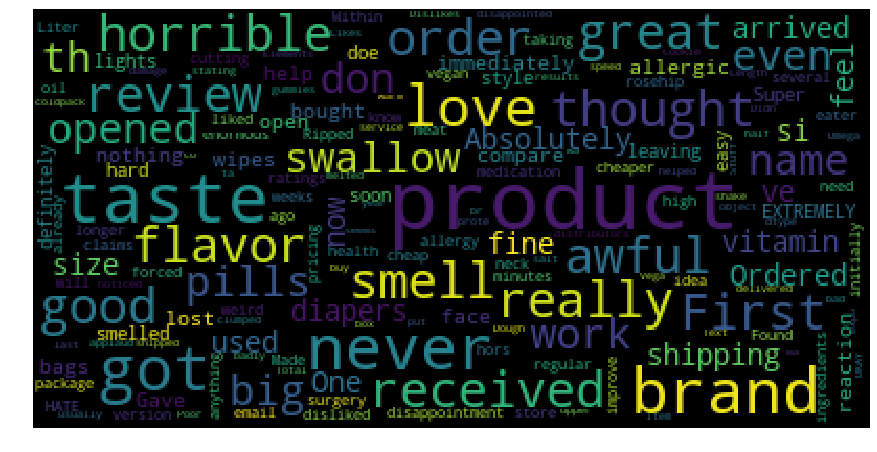

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

def create_wordcloud(data, title = None):
    wordcloud = WordCloud(stopwords=stopwords,max_font_size= 40).generate(str(data))
    
    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    
create_wordcloud(train_data['Review Text'])

#### Preprocessing

In [14]:
from nltk.stem import WordNetLemmatizer
import re

In [15]:
def clean_text(text_data):
    text= str(text_data)
    
    #removing symbols
    text = re.sub("[^A-Za-z]+", " ", text)
    tokens = text.split()
    #lemmatizing
    wordnet_lemmatizer = WordNetLemmatizer()
    text = " ".join([wordnet_lemmatizer.lemmatize(w, pos='n') for w in text.split()])
    
    return text

In [16]:
train_data['Review Text'] = train_data['Review Text'].map(lambda x: clean_text(x))
test_data['Review Text'] = test_data['Review Text'].map(lambda x: clean_text(x))
train_data['Review Title']= train_data['Review Title'].map(lambda x: clean_text(x))
test_data['Review Title']= test_data['Review Title'].map(lambda x: clean_text(x))

In [17]:
import string
punctuations = string.punctuation
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(punctuations)

In [18]:
topics =train_data.topic.unique().tolist()
topics.sort()

In [19]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['topic'], axis = 1)
y = train_data.topic
x= test_data


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3147, 2) (1049, 2) (3147,) (1049,)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words = stop)
X_train_dtm = vect.fit_transform(X_train['Review Text'])

In [21]:
X_train_dtm

<3147x6499 sparse matrix of type '<class 'numpy.int64'>'
	with 62766 stored elements in Compressed Sparse Row format>

In [22]:
X_test_dtm = vect.transform(X_test['Review Text'])

#### Modeling

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
base_clf= [SVC(probability= True), GradientBoostingClassifier(),RandomForestClassifier(),XGBClassifier()]
stack_clf= XGBClassifier()

In [24]:
#!pip install vecstack
from vecstack import stacking

In [25]:
s_train, s_test =stacking(base_clf, X_train_dtm, y_train, X_test_dtm,regression =False, needs_proba=True, n_folds=3, stratified=True,random_state=0, verbose=2)

task:         [classification]
n_classes:    [21]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [SVC]
    fold  0:  [1.87547704]
    fold  1:  [1.89564659]
    fold  2:  [1.77616889]
    ----
    MEAN:     [1.84909751] + [0.05222158]
    FULL:     [1.84934355]

model  1:     [GradientBoostingClassifier]
    fold  0:  [1.22972119]
    fold  1:  [1.21743355]
    fold  2:  [1.22792569]
    ----
    MEAN:     [1.22502681] + [0.00541905]
    FULL:     [1.22503528]

model  2:     [RandomForestClassifier]
    fold  0:  [5.42200192]
    fold  1:  [4.66590823]
    fold  2:  [5.64712821]
    ----
    MEAN:     [5.24501279] + [0.41967609]
    FULL:     [5.24468075]

model  3:     [XGBClassifier]
    fold  0:  [1.14697480]
    fold  1:  [1.16620045]
    fold  2:  [1.17736775]
    ----
    MEAN:     [1.16351433] + [0.01255240]
    FULL:     [1.16343096]



In [26]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
models ={}
for z in topics:
    model=XGBClassifier()
    y=y_train==z
    model.fit(s_train,y)
    models[z]=model
testing_probs=pd.DataFrame(columns= topics)

In [27]:
for topic in topics:
    testing_probs[topic] = models[topic].predict_proba(s_test)[:,1]
    
predicted_topic = testing_probs.idxmax(axis=1)

comparison = pd.DataFrame({'actual':y_test.values, 'predicted':predicted_topic.values})   

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%")
comparison.head(25)

Accuracy Score: 73.11725452812202 %


,actual,predicted
0,Allergic,Allergic
1,Packaging,Packaging
2,Quality/Contaminated,Bad Taste/Flavor
3,Smells Bad,Color and texture
4,Too Sweet,Too Sweet
5,Packaging,Packaging
6,Shipment and delivery,Shipment and delivery
7,Packaging,Shipment and delivery
8,Wrong Product received,Shipment and delivery
9,Bad Taste/Flavor,Smells Bad


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = stop)
train_dtm = vect.fit_transform(train_x['Review Text'])
test_dtm = vect.transform(test_x['Review Text'])

In [29]:
model ={}
for z in topics:
    model=XGBClassifier()
    y=train_y==z
    model.fit(train_dtm,y)
    models[z]=model
testing_probs=pd.DataFrame(columns= topics)

In [30]:
for topic in topics:
    testing_probs[topic] = models[topic].predict_proba(test_dtm)[:,1]
    
predicted_topic = testing_probs.idxmax(axis=1)

#### saving predictons

In [31]:
output = pd.DataFrame({'Review Text': test_data['Review Text'],
                       'Review Title': test_data['Review Title'],
                      'topic':predicted_topic})
output.to_csv('submission6.csv', index=False)
output.head()

,Review Text,Review Title,topic
0,I use chia seed in my protein shake These tast...,Bad tast,Bad Taste/Flavor
1,I use chia seed in my protein shake These tast...,Bad tast,Bad Taste/Flavor
2,Don t waste your money,No change No result,Not Effective
3,I use the book Fortify Your Life by Tieraona L...,Good Vegan Choice Poor Non Vegan Choice,Ingredients
4,I use the book Fortify Your Life by Tieraona L...,Good Vegan Choice Poor Non Vegan Choice,Ingredients


In [32]:
concerns_df = output.groupby('topic').filter(lambda x: len(x) > 100)
concerns = concerns_df['topic'].value_counts().index.tolist()

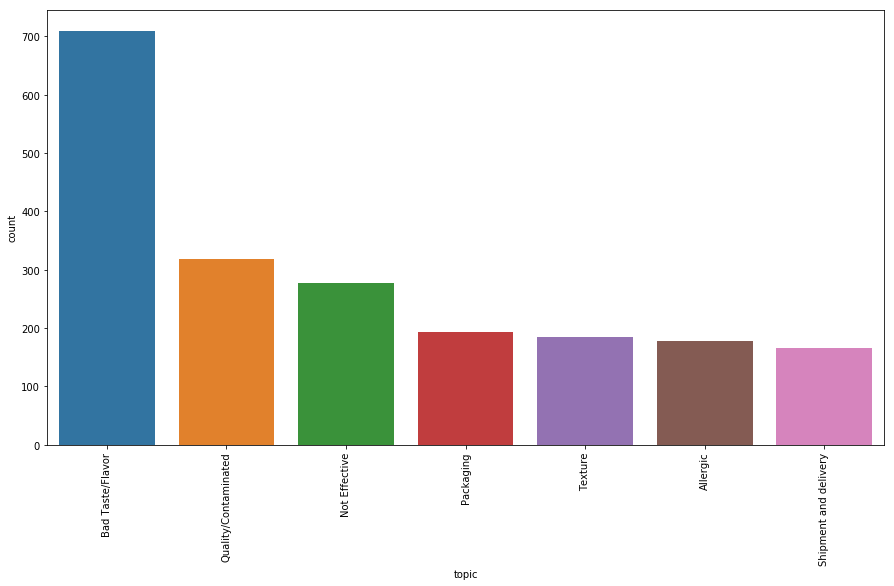

In [33]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(x = concerns_df['topic'], order = concerns, ax = ax)
plt.xticks(rotation = 90)
plt.show()

#### From the analysis of reviews, it can be inferred that the top most 3 concern of customers relates to the Bad Taste/Flavour , Quality, and non-effectiveness of the product